<h1>PAD - Assignment 3</h1>

<h2>Standard Deviation</h2>

<h3>Roshan Srivastava <br>  J047 <br>  MBA Tech. EXTC SEM 7</h3>

<h2>Part 1</h2>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

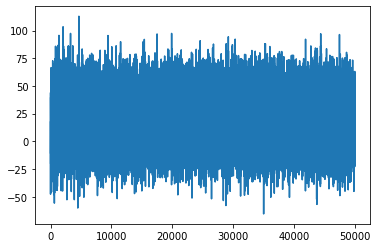

In [3]:
data = np.random.randn(50000)*20 + 20 # creating random dataset
plt.plot(data)

In [4]:
std = np.std(data) #calculating mean and standard deviation
mean = np.mean(data)
std,mean

(20.05162665871098, 19.955986093241727)

In [5]:
anomaly_cutoff = std*3  #anomaly range
anomalies = np.where(np.bitwise_or(mean>=data+anomaly_cutoff,mean<=data-anomaly_cutoff),1,0) #detecting anomalies
np.sum(anomalies)


134

<h2>Part 2: Boxplot</h2>

In [7]:
import seaborn as sns

<AxesSubplot:>

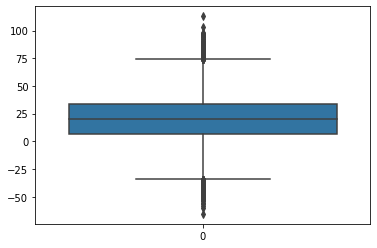

In [10]:
sns.boxplot(data = data)

<h2>Part 3: Tukey's Boxplot</h2>

In [12]:
q1 = np.quantile(data,0.25)
q3 = np.quantile(data,0.75)
q1,q3

(6.3382670860435315, 33.51223994264825)

In [13]:
inter_quartile = q3-q1
inner_fence = 1.5*inter_quartile
outer_fence = 3*inter_quartile
inner_fence,outer_fence

(40.76095928490708, 81.52191856981416)

In [15]:
inner_fence_lower = q1 - inner_fence
inner_fence_upper = q3 + inner_fence
inner_fence_lower,inner_fence_upper

(-34.42269219886355, 74.27319922755532)

In [16]:
outer_fence_lower = q1 - outer_fence
outer_fence_upper = q3 + outer_fence
outer_fence_lower,outer_fence_upper

(-75.18365148377063, 115.03415851246241)

In [22]:
outlier_prob = []
outlier_poss = []
for i,temp in enumerate(data):
    if outer_fence_lower >= temp or temp >= outer_fence_upper:
        outlier_prob.append(temp)
    elif inner_fence_lower >= temp or temp >= inner_fence_upper:
        outlier_poss.append(temp)
len(outlier_prob),len(outlier_poss)

(0, 345)

<h2>Part 4: Z-Score</h2>

In [23]:
from scipy import stats

In [32]:
z = np.abs(stats.zscore(data))
threshold = 3
outliers = np.where(z>threshold,1,0)
sum(outliers)

134

<h2>Part 5: Median Absolute Deviation Method</h2>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

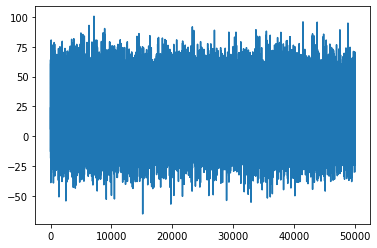

In [6]:
data = np.random.randn(50000) * 20 + 20
plt.plot(data)

In [7]:
med = np.median(data,axis=0)
mad = np.abs(stats.median_absolute_deviation(data))
threshold = 3
outliers = np.where((data-mad)/mad>=threshold,1,0) 
sum(outliers)

57

<h2>Part 6: Mahabolis Distance</h2>

In [4]:
import scipy
from sklearn.covariance import MinCovDet
from sklearn.datasets import load_boston
import pandas as pd

In [5]:
bost = load_boston()
x,y = load_boston(return_X_y=True)
columns = bost.feature_names
data = pd.DataFrame(x,columns=columns)

In [10]:
def mahalanbolis(data):
    xmu = data - np.mean(data)
    cov = np.cov(data.values.T)
    invCov = scipy.linalg.inv(cov)
    m_dist = np.sqrt(np.dot(np.dot(xmu,invCov),xmu.T).diagonal())
    chival = np.sqrt(scipy.stats.chi2.ppf(1-0.001,df=data.shape[1]))
    
    return np.where(m_dist>chival,1,0),m_dist  


In [12]:
outliers,maha_dst = mahalanbolis(data)
sum(outliers)

17